# Lasso regression and decision trees as tools for EDA<br>
2022-12-09

## Overview

Data: Ten baseline variables (age, sex, body mass index, average<br>
blood pressure, and six blood serum measurements) were obtained for each of<br>
n=n442 diabetes patients.

Each of these 10 feature variables have been mean centered and scaled by the<br>
standard deviation times the square root of n_samples (i.e. the sum of squares of<br>
each column totals 1)

## References

- [scikit-learn doc on diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)  # noqa

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

## Data setup

In [2]:
diabetes = load_diabetes()

In [3]:
df_diabetes = pd.concat(
    [pd.DataFrame(diabetes["data"]), pd.DataFrame(diabetes["target"])], axis=1
)
num_x_cols = 10
x_col_names = [f"x_0{num}" for num in range(1, 10)] + [
    f"x_{num}" for num in range(10, 11)
]
df_diabetes.columns = x_col_names + ["y"]
df_diabetes.reset_index(drop=False, inplace=True)

In [4]:
df_diabetes.head()
df_diabetes.shape
df_diabetes.describe()
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   442 non-null    int64  
 1   x_01    442 non-null    float64
 2   x_02    442 non-null    float64
 3   x_03    442 non-null    float64
 4   x_04    442 non-null    float64
 5   x_05    442 non-null    float64
 6   x_06    442 non-null    float64
 7   x_07    442 non-null    float64
 8   x_08    442 non-null    float64
 9   x_09    442 non-null    float64
 10  x_10    442 non-null    float64
 11  y       442 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 41.6 KB


## Plots

In [5]:
df_melted = df_diabetes.melt(id_vars=["index"], value_vars=[col for col in df_diabetes])

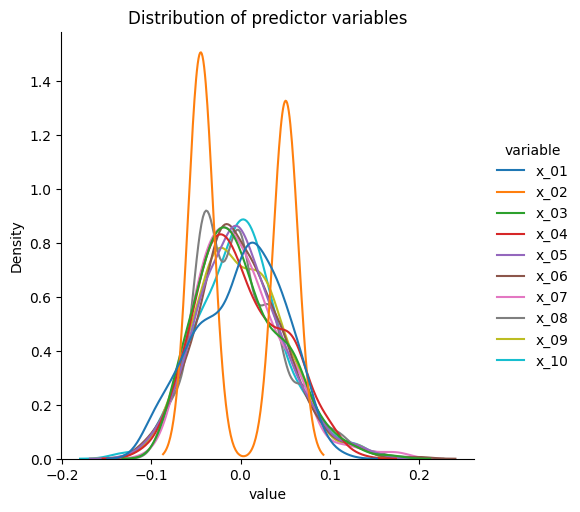

In [6]:
title = "Distribution of predictor variables"
sns.displot(
    df_melted.query('variable != "y"'),
    x="value",
    hue="variable",
    kind="kde",
)
plt.title(title)
plt.show()

In [7]:
assert df_diabetes["x_02"].nunique() == 2

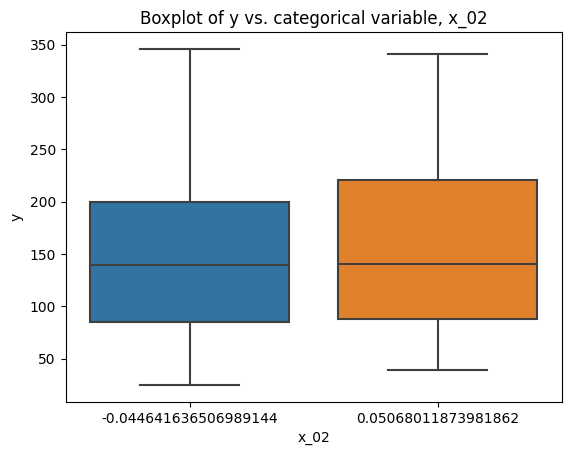

In [8]:
title = "Boxplot of y vs. categorical variable, x_02"
sns.boxplot(df_diabetes[["x_02", "y"]], x="x_02", y="y")
plt.title(title)
plt.show()

In [9]:
df_diabetes.groupby("x_02")["y"].mean()

x_02
-0.044642    149.021277
 0.050680    155.666667
Name: y, dtype: float64

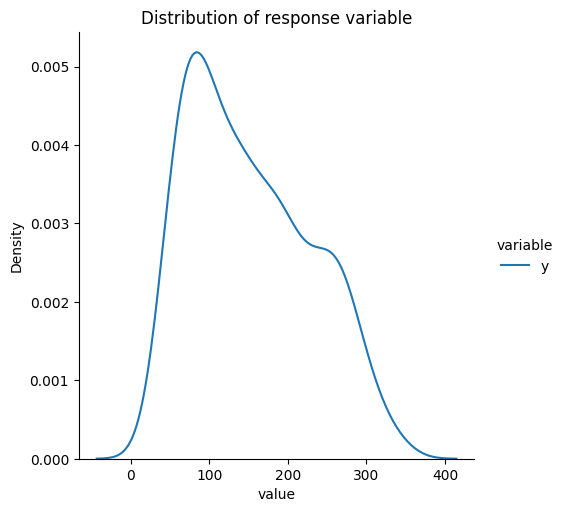

In [10]:
title = "Distribution of response variable"
sns.displot(
    df_melted.query('variable == "y"'),
    x="value",
    hue="variable",
    kind="kde",
)
plt.title(title)
plt.show()

C:\Users\vr229e\AppData\Local\Temp\ipykernel_33872\2778344840.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


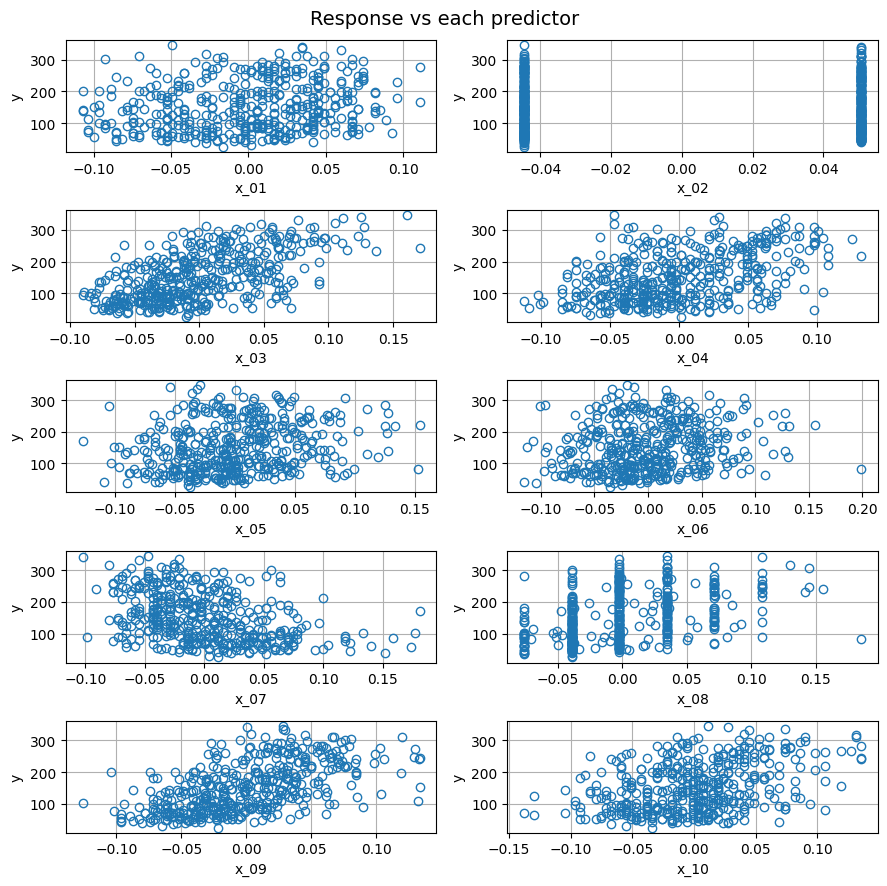

In [11]:
title = "Response vs each predictor"
fig = plt.figure(figsize=(9, 9))
for idx, x_var in enumerate(df_diabetes[x_col_names]):
    ax = plt.subplot(5, 2, idx + 1)
    ax.plot(df_diabetes[x_var], df_diabetes["y"], "o", mfc="none")
    ax.set_ylabel("y")
    ax.set_xlabel(x_var)
    ax.grid(True)
plt.suptitle(title, fontsize=14)
fig.tight_layout()
fig.show()

## Analysis focusing on y, x_07, and x_02

- Assume that we want to interpret the coefficient of x_07<br>
- Goal: show that regression allows us to adjust for x_02 and give a better estimate<br>
  of the intercept.

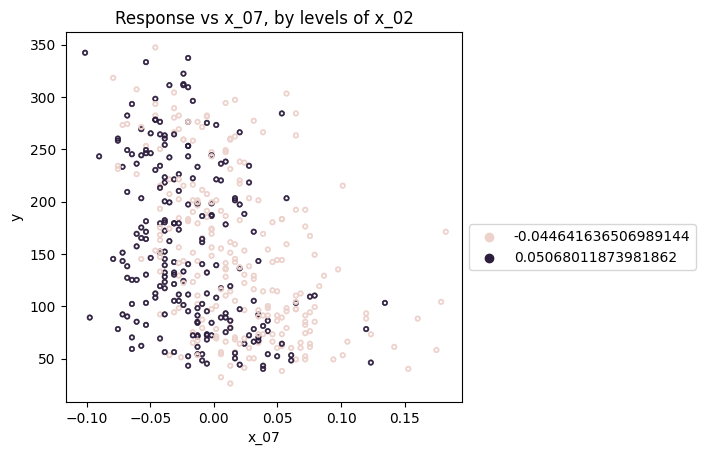

In [12]:
x_var = "x_07"
title = f"Response vs {x_var}, by levels of x_02"
ax = sns.scatterplot(
    df_diabetes[["x_02", x_var, "y"]],
    x=x_var,
    y="y",
    hue="x_02",
    marker="$\circ$",  # noqa
    ec="face",
)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(bbox_to_anchor=(1, 0.5))
ax.set_title(title)
plt.show()